<a href="https://colab.research.google.com/github/shilpeemaitra/Lab/blob/main/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/customer_shopping_data.csv")

In [ ]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
data.drop(columns=['invoice_no','invoice_date'], axis=1, inplace=True)


In [ ]:
data.describe()


,age,quantity,price
count,82958.000000,82958.000000,82957.000000
mean,43.420755,3.002941,690.084645
std,14.992913,1.413307,943.041157
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82958 entries, 0 to 82957
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     82958 non-null  object 
 1   gender          82958 non-null  object 
 2   age             82958 non-null  int64  
 3   category        82958 non-null  object 
 4   quantity        82958 non-null  int64  
 5   price           82957 non-null  float64
 6   payment_method  82957 non-null  object 
 7   shopping_mall   82957 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.1+ MB


<ipython-input-49-d737b59bcea8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='jet')


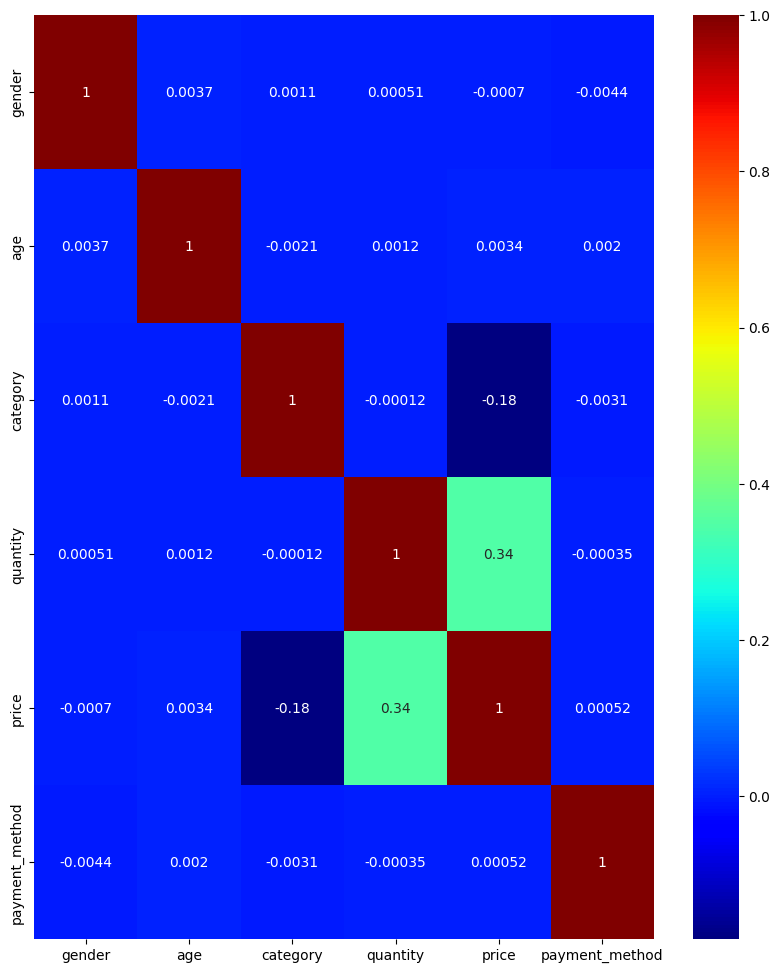

In [49]:
plt.figure(figsize=(10, 12))
sns.heatmap(data.corr(), annot=True, cmap='jet')
plt.show()

In [ ]:
data.isnull().sum()

customer_id       0
gender            0
age               0
category          0
quantity          0
price             1
payment_method    1
shopping_mall     1
dtype: int64

Visualization

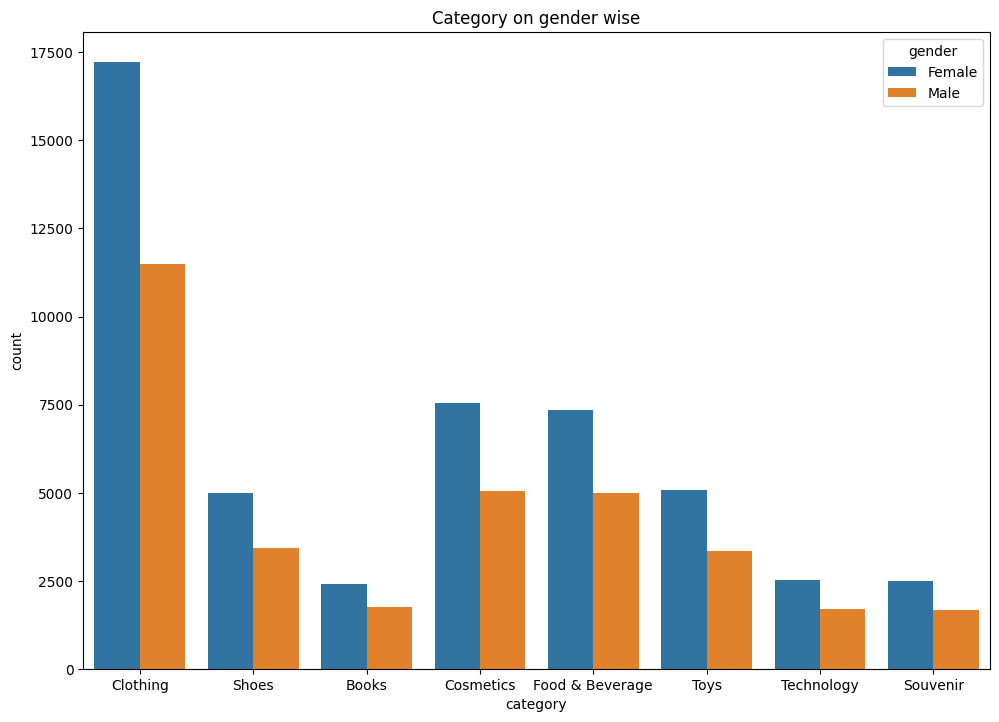

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x ='category',hue = "gender", data = data)
plt.title("Category on gender wise")
plt.show()

In [ ]:
data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [ ]:
max_age = data['age'].max()
print("MAX AGE OF CUSTOMER:", max_age)

MAX AGE OF CUSTOMER: 69


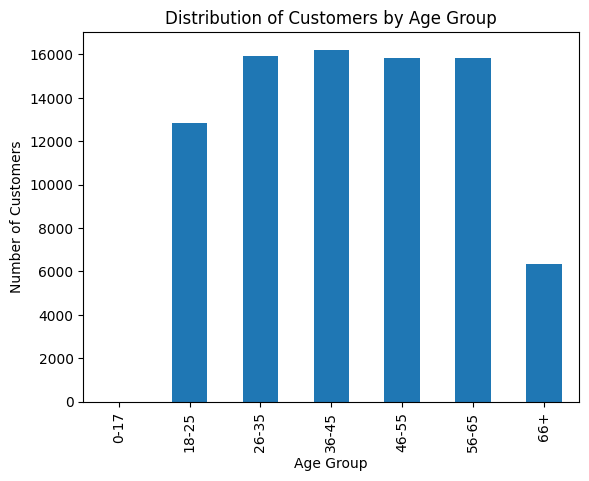

In [ ]:
  data['age_group'] = pd.cut(data['age'], bins=[0, 17, 25, 35, 45, 55, 65, 100], labels=['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'])
# GROUPING AND COUNTING THE DATA
age_group_counts = data.groupby('age_group')['customer_id'].count()

age_group_counts.plot(kind='bar') #BAR GRAPH

plt.xlabel('Age Group') # LABELLING
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age Group')



plt.show()

In [ ]:
gender_counts = data['gender'].value_counts()

print(gender_counts)

Female    49568
Male      33390
Name: gender, dtype: int64


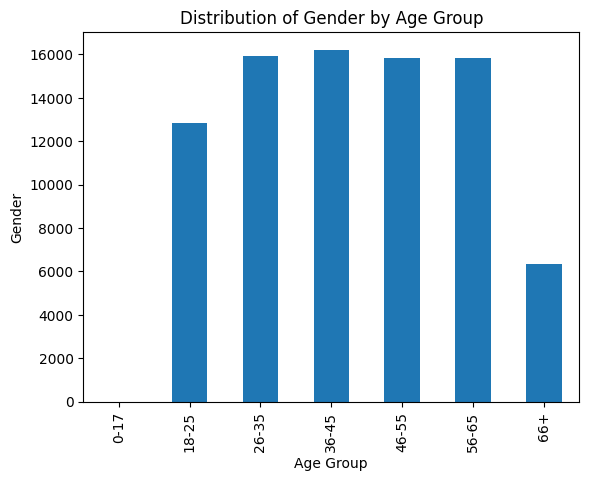

In [ ]:
data['age_group'] = pd.cut(data['age'], bins=[0, 17, 25, 35, 45, 55, 65, 100], labels=['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'])
# group the data by age group and calculate the count
age_group_counts = data.groupby('age_group')['gender'].count()
# create a bar chart
age_group_counts.plot(kind='bar')
# add labels and title
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.title('Distribution of Gender by Age Group')
# display the chart
plt.show()

In [ ]:
print(data['gender'].unique())

['Female' 'Male']


In [ ]:
print(data['category'].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [ ]:
print(data['payment_method'].unique())

['Credit Card' 'Debit Card' 'Cash' nan]


In [ ]:
print(data['shopping_mall'].unique())

['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center' nan]


In [ ]:
data.replace({'gender':{'Male':0,'Female':1},'category':{'Clothing':0,'Shoes':1,'Books':2,'Cosmetics':3,'Food & Beverage':4,'Toys':5,'Technology':6,'Souvenir':7}, 'payment_method':{'Credit Card':0,'Debit Card':1,'Cash':2},},inplace=True)


<Axes: xlabel='gender', ylabel='count'>

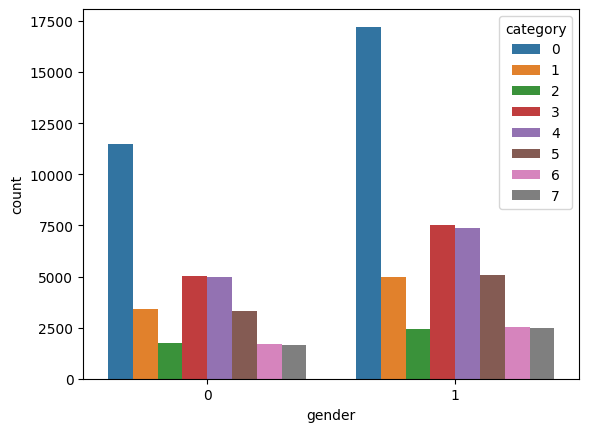

In [ ]:
sns.countplot(data=data,x='gender', hue='category')

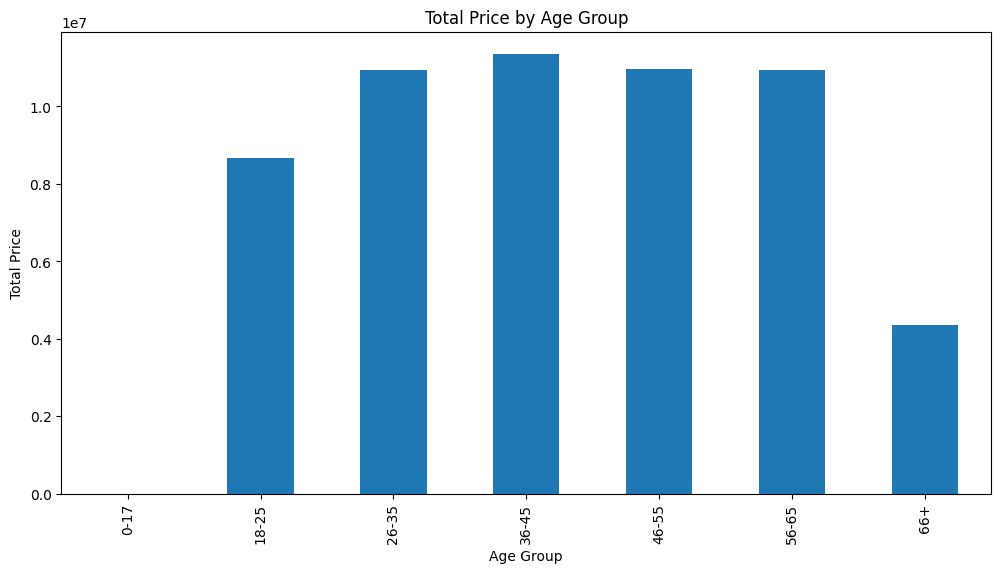

In [ ]:
# Create a bar plot for age group vs. total price
age_group_mean_price = data.groupby('age_group')['price'].sum()
plt.figure(figsize=(12, 6))
age_group_mean_price.plot(kind='bar')
plt.title('Total Price by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Price')
plt.show()

In [ ]:
data['age_group'] = pd.cut(data['age'], bins=[0, 17, 25, 35, 45, 55, 65, 100], labels=['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'])


In [ ]:
contingency_table = pd.crosstab(data['age_group'], data['gender'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

Chi-square statistic: 6.6504269404837375
P-value: 0.24796323435103246
Degrees of freedom: 5
Expected frequencies:
 [[5160.76303672 7661.23696328]
 [6400.44094602 9501.55905398]
 [6528.43366523 9691.56633477]
 [6369.85149112 9456.14850888]
 [6378.3038405  9468.6961595 ]
 [2552.20702042 3788.79297958]]


In [ ]:
male_data = data[data['gender'] == 'male']
female_data = data[data['gender'] == 'female']

In [ ]:
t_statistic, p_value = ttest_ind(male_data['age'], female_data['age'])

In [ ]:
# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: nan
P-value: nan


In [ ]:
# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between the average ages of males and females.")
else:
    print("There is no statistically significant difference between the average ages of males and females.")

There is no statistically significant difference between the average ages of males and females.


In [ ]:
encoded_data = pd.get_dummies(data, columns=['gender'], prefix=['gender'])


In [ ]:
print(encoded_data.head())

  customer_id  age  category  quantity    price  payment_method  \
0     C241288   28         0         5  1500.40             0.0   
1     C111565   21         1         3  1800.51             1.0   
2     C266599   20         0         1   300.08             2.0   
3     C988172   66         1         5  3000.85             0.0   
4     C189076   53         2         4    60.60             2.0   

    shopping_mall age_group  gender_0  gender_1  
0          Kanyon     26-35         0         1  
1  Forum Istanbul     18-25         1         0  
2       Metrocity     18-25         1         0  
3    Metropol AVM       66+         0         1  
4          Kanyon     46-55         0         1  


In [ ]:
covariance = data['age'].cov(data['price'])


In [ ]:
print(f"Covariance between age and price: {covariance}")

Covariance between age and price: 47.75868953148013
